In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import os
import math
import seaborn as sns

In [3]:
df=pd.read_csv('data.csv')

In [4]:
df.head()

,Title,Ratings,Original_Price,Discounted_Price,Link
0,BauliMoonfils Croissant - Vanilla Creme4.27284...,4.2,₹80,₹59.04,https://bigbasket.in/pd/1228556/bauli-moonfils...
1,fresho! SignatureCorn Bread - Pre-Sliced300 g,NaN,NaN,₹95,https://bigbasket.in/pd/40037478/fresho-signat...
2,fresho! SignatureFocaccia Bread - Onion3.4362 ...,3.4,NaN,₹75,https://bigbasket.in/pd/40037487/fresho-signat...
3,Dayspring100% Atta Bread338 Ratings400 g,3.0,NaN,₹45,https://bigbasket.in/pd/40312367/dayspring-100...
4,English OvenButter Croissant3.733 Ratings120 g,3.7,NaN,₹170,https://bigbasket.in/pd/40302408/english-oven-...


In [5]:
df=df.drop(['Discounted_Price','Link'],axis=1)

In [6]:
df

,Title,Ratings,Original_Price
0,BauliMoonfils Croissant - Vanilla Creme4.27284...,4.2,₹80
1,fresho! SignatureCorn Bread - Pre-Sliced300 g,NaN,NaN
2,fresho! SignatureFocaccia Bread - Onion3.4362 ...,3.4,NaN
3,Dayspring100% Atta Bread338 Ratings400 g,3.0,NaN
4,English OvenButter Croissant3.733 Ratings120 g,3.7,NaN
...,...,...,...
7090,AHAARSuper Whole Wheat Atta3.830 Ratings10 kg,3.8,₹660
7091,Double HorseWheat Broken Fine4.181 Ratings500 ...,4.1,₹75
7092,Ammamma'sWhole Wheat Chapati3.9130 Ratings10 pcs,3.9,NaN
7093,Phalada Pure & SureOrganic - Wheat Flour3.8155...,3.8,NaN


In [7]:
df['Title'].unique

<bound method Series.unique of 0       BauliMoonfils Croissant - Vanilla Creme4.27284...
1           fresho! SignatureCorn Bread - Pre-Sliced300 g
2       fresho! SignatureFocaccia Bread - Onion3.4362 ...
3                Dayspring100% Atta Bread338 Ratings400 g
4          English OvenButter Croissant3.733 Ratings120 g
                              ...                        
7090        AHAARSuper Whole Wheat Atta3.830 Ratings10 kg
7091    Double HorseWheat Broken Fine4.181 Ratings500 ...
7092     Ammamma'sWhole Wheat Chapati3.9130 Ratings10 pcs
7093    Phalada Pure & SureOrganic - Wheat Flour3.8155...
7094    Natureland OrganicsWheat Maida - Refined & Ble...
Name: Title, Length: 7095, dtype: object>

In [8]:
df['Original_Price'].unique

<bound method Series.unique of 0        ₹80
1        NaN
2        NaN
3        NaN
4        NaN
        ... 
7090    ₹660
7091     ₹75
7092     NaN
7093     NaN
7094     ₹70
Name: Original_Price, Length: 7095, dtype: object>

In [9]:
df['Title']=df['Title'].str.split(' ').str.slice(0,2).str.join(' ')

In [10]:
df.head(5)

,Title,Ratings,Original_Price
0,BauliMoonfils Croissant,4.2,₹80
1,fresho! SignatureCorn,NaN,NaN
2,fresho! SignatureFocaccia,3.4,NaN
3,Dayspring100% Atta,3.0,NaN
4,English OvenButter,3.7,NaN


In [11]:
df['Original_Price'].isna().sum()

3889

In [12]:
df['Ratings'].isna().sum()

2454

In [13]:
df.dropna(subset=['Original_Price','Ratings'] , inplace=True)

In [14]:
df.head()

,Title,Ratings,Original_Price
0,BauliMoonfils Croissant,4.2,₹80
35,MODERNWow Pav,3.9,₹35
36,LA AmericanaWholewheat,4.0,₹65
39,MODERNBurger Supreme,4.0,₹30
40,MODERNWow Pav,3.8,₹25


In [15]:
df['Original_Price']=df['Original_Price'].str.replace('₹','').str.replace(',','').astype(float)

In [16]:
df.head(5)

,Title,Ratings,Original_Price
0,BauliMoonfils Croissant,4.2,80.0
35,MODERNWow Pav,3.9,35.0
36,LA AmericanaWholewheat,4.0,65.0
39,MODERNBurger Supreme,4.0,30.0
40,MODERNWow Pav,3.8,25.0


In [17]:
df.reset_index(drop=True,inplace=True)

In [18]:
df.describe()

,Ratings,Original_Price
count,1876.000000,1876.000000
mean,4.021002,313.919190
std,0.355252,400.251059
min,3.000000,12.000000
25%,3.900000,90.000000
50%,4.000000,160.000000
75%,4.200000,375.000000
max,5.000000,3600.000000


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1876 entries, 0 to 1875
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Title           1876 non-null   object 
 1   Ratings         1876 non-null   float64
 2   Original_Price  1876 non-null   float64
dtypes: float64(2), object(1)
memory usage: 44.1+ KB


In [26]:
n = len(df)
random_days = np.random.randint(0, 1000, n)
df['Manufacturing_Date'] = pd.to_datetime(np.datetime64('today') - random_days)
df['Expiry_Date'] = df['Manufacturing_Date'] + pd.Timedelta(days=30)

In [27]:
df.head()

,Title,Ratings,Original_Price,Manufacturing_Date,Expiry_Date
0,BauliMoonfils Croissant,4.2,80.0,2024-05-22,2024-06-21
1,MODERNWow Pav,3.9,35.0,2024-08-16,2024-09-15
2,LA AmericanaWholewheat,4.0,65.0,2024-11-08,2024-12-08
3,MODERNBurger Supreme,4.0,30.0,2023-12-20,2024-01-19
4,MODERNWow Pav,3.8,25.0,2022-11-08,2022-12-08


1st we will convert Manufactuirng Date and Exipry column from object to date datatype

In [28]:
df['Manufacturing_Date']=pd.to_datetime(df['Manufacturing_Date'])

In [29]:
df['Manufacturing_Date']=df['Manufacturing_Date'].dt.strftime('%Y-%m-%d')

In [30]:
df['Expiry_Date']=pd.to_datetime(df['Expiry_Date'])

In [31]:
df['Expiry_Date']=df['Expiry_Date'].dt.strftime('%Y-%m-%d')

In [32]:
df.head()

,Title,Ratings,Original_Price,Manufacturing_Date,Expiry_Date
0,BauliMoonfils Croissant,4.2,80.0,2024-05-22,2024-06-21
1,MODERNWow Pav,3.9,35.0,2024-08-16,2024-09-15
2,LA AmericanaWholewheat,4.0,65.0,2024-11-08,2024-12-08
3,MODERNBurger Supreme,4.0,30.0,2023-12-20,2024-01-19
4,MODERNWow Pav,3.8,25.0,2022-11-08,2022-12-08


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1876 entries, 0 to 1875
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Title               1876 non-null   object 
 1   Ratings             1876 non-null   float64
 2   Original_Price      1876 non-null   float64
 3   Manufacturing_Date  1876 non-null   object 
 4   Expiry_Date         1876 non-null   object 
dtypes: float64(2), object(3)
memory usage: 73.4+ KB


In [34]:
#converting datatype to datetime
df['Manufacturing_Date'] = pd.to_datetime(df['Manufacturing_Date'])
df['Expiry_Date'] = pd.to_datetime(df['Expiry_Date'])

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1876 entries, 0 to 1875
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Title               1876 non-null   object        
 1   Ratings             1876 non-null   float64       
 2   Original_Price      1876 non-null   float64       
 3   Manufacturing_Date  1876 non-null   datetime64[ns]
 4   Expiry_Date         1876 non-null   datetime64[ns]
dtypes: datetime64[ns](2), float64(2), object(1)
memory usage: 73.4+ KB


In [36]:
df['total_days']=(df['Expiry_Date']-df['Manufacturing_Date']).dt.days

In [37]:
conditions=[
    (df['Ratings'] >= 3) & (df['Ratings']<=3.8),                        # Low demand
    (df['Ratings'] >3.9 ) & (df['Ratings'] <= 4.5),                    # Medium demand
    (df['Ratings'] > 4.5)                                               # High demand
]

choices = ['Low','Medium','High']

df['Demand']=np.select(conditions,choices,default='Medium')

In [38]:
demand_mapping = {' High':2,'Medium':1,'Low':0}
df['Demand_rank']=df['Demand'].map(demand_mapping)

In [39]:
df

,Title,Ratings,Original_Price,Manufacturing_Date,Expiry_Date,total_days,Demand,Demand_rank
0,BauliMoonfils Croissant,4.2,80.0,2024-05-22,2024-06-21,30,Medium,1.0
1,MODERNWow Pav,3.9,35.0,2024-08-16,2024-09-15,30,Medium,1.0
2,LA AmericanaWholewheat,4.0,65.0,2024-11-08,2024-12-08,30,Medium,1.0
3,MODERNBurger Supreme,4.0,30.0,2023-12-20,2024-01-19,30,Medium,1.0
4,MODERNWow Pav,3.8,25.0,2022-11-08,2022-12-08,30,Low,0.0
...,...,...,...,...,...,...,...,...
1871,AashirvaadAtta -,4.0,670.0,2024-11-04,2024-12-04,30,Medium,1.0
1872,Natureland OrganicsWheat,4.1,55.0,2025-04-04,2025-05-04,30,Medium,1.0
1873,AHAARSuper Whole,3.8,660.0,2023-09-28,2023-10-28,30,Low,0.0
1874,Double HorseWheat,4.1,75.0,2024-05-19,2024-06-18,30,Medium,1.0


# steps to calulate discount factor using dynamic pricing

In [84]:
import random
import math
import pandas as pd

# Convert 'Expiry_Date' to datetime and normalize it (remove time part)
df['Expiry_Date'] = pd.to_datetime(df['Expiry_Date']).dt.normalize()

# Input the date of issue
date_of_issue_input = input("Enter date of issue (YYYY-MM-DD): ")
date_of_issue = pd.to_datetime(date_of_issue_input).normalize()

# Calculate the days remaining until expiry
df['days_remaining'] = (df['Expiry_Date'] - date_of_issue).dt.days
df['days_remaining'] = df['days_remaining'].apply(lambda x: max(x, 0))  # no negative days


# Function to get the discount percentage
def get_discount_percentage(demand_rank, days_remaining, total_days=30):
    base_discount = 8.0
    if demand_rank == 2:
        base_discount = 9.5
    elif demand_rank == 1:
        base_discount = 11.5
    elif demand_rank == 0:
        base_discount = 14.0

    # Increase discount as the product nears expiry
    urgency_factor = (1 - (days_remaining / total_days))  # higher when closer to expiry
    dynamic_discount = base_discount + (urgency_factor * 5)  # up to 5% more

    return round(min(dynamic_discount, 20), 2)  # cap at 20% if needed


# Function to calculate dynamic pricing
def dynamic_pricing(mrp, days_remaining, total_days, base_discount):
    if days_remaining <= 0:
        return "Product is expired"  # Return 'Product is expired' if the product is expired
    else:
        # Calculate discount factor based on remaining days
        discount_factor = 1 - math.exp(-0.2 * (total_days - days_remaining))
        max_discount = (base_discount / 100) * mrp
        return round(max_discount * discount_factor, 2)


# Apply the discount percentage calculation
df['Discount_Percentage'] = df.apply(
    lambda row: get_discount_percentage(row['Demand_rank'], row['days_remaining']),
    axis=1
)

# Apply the dynamic pricing calculation
df['discount'] = df.apply(
    lambda row: dynamic_pricing(
        row['Original_Price'],
        row['days_remaining'],
        30,  # total_days (can be adjusted as needed)
        row['Discount_Percentage']
    ),
    axis=1
)


In [85]:
import numpy as np
#for products not present in dataset
def encode_product_name(product_name, label_encoder):
    if product_name in label_encoder.classes_:
        return label_encoder.transform([product_name])[0]
    else:
        # Default to mean or a special value like -1
        return int(np.mean(label_encoder.transform(label_encoder.classes_)))  # or -1

In [86]:
df.head()

,Title,Ratings,Original_Price,Manufacturing_Date,Expiry_Date,total_days,Demand,Demand_rank,days_remaining,Discount_Percentage,discount,ProductName_encoded
0,baulimoonfils croissant,4.2,80.0,2024-05-22,2024-06-21,30,Medium,1.0,3,16.00,12.74,61
1,modernwow pav,3.9,35.0,2024-08-16,2024-09-15,30,Medium,1.0,89,1.67,-77885.42,448
2,la americanawholewheat,4.0,65.0,2024-11-08,2024-12-08,30,Medium,1.0,173,-12.33,21120228653048.800781,396
3,modernburger supreme,4.0,30.0,2023-12-20,2024-01-19,30,Medium,1.0,0,16.50,Product is expired,446
4,modernwow pav,3.8,25.0,2022-11-08,2022-12-08,30,Low,0.0,0,19.00,Product is expired,448


# EDA(plotting)

<Axes: xlabel='Original_Price', ylabel='Ratings'>

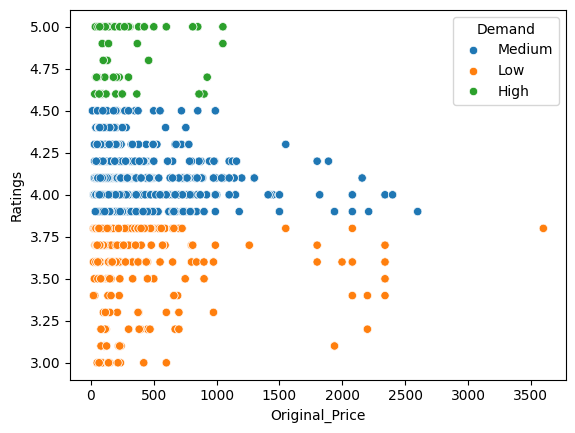

In [87]:
sns.scatterplot(data=df , x='Original_Price' , y='Ratings' , hue='Demand')

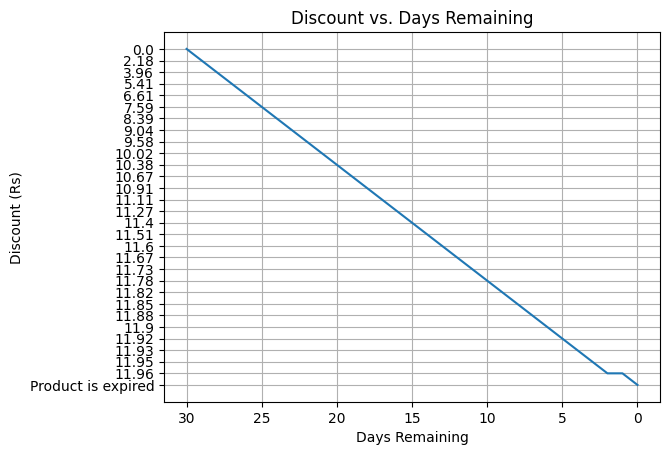

In [88]:
days = list(range(0, 31))
discounts = [dynamic_pricing(100, d, 30, 12) for d in days]

plt.plot(days, discounts)
plt.xlabel("Days Remaining")
plt.ylabel("Discount (Rs)")
plt.title("Discount vs. Days Remaining")
plt.grid(True)
plt.gca().invert_xaxis()
plt.show()

# Preparing data for Random forest Regressor

# Model trainig

In [89]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import LabelEncoder

In [90]:
df_clean = df.dropna(subset=['Discount_Percentage'])


In [91]:
le = LabelEncoder()

In [92]:
df['ProductName_encoded'] = le.fit_transform(df['Title'])

In [93]:
X=df[['ProductName_encoded','Original_Price','days_remaining']]
y=df_clean['Discount_Percentage']

In [94]:
common_index = X.index.intersection(y.index)
X = X.loc[common_index]
y = y.loc[common_index]

In [95]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [96]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [97]:
# Predict
y_pred = model.predict(X_test)

# Evaluate
print("R² Score:", r2_score(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))

R² Score: 0.991536535567377
MSE: 2.201008926859022


In [99]:
import pickle

In [100]:
pickle.dump(model,open('dynamic_pricing.pkl','wb'))

In [101]:
df.to_csv("final_data.csv",index=False)